In [3]:
import pandas as pd

# Load the cleaned dataset
df_cleaned = pd.read_csv('Cleaned_BrentOilPrices.csv', parse_dates=['Date'])

# Create additional features (e.g., moving average)
df_cleaned['SMA_10'] = df_cleaned['Price'].rolling(window=10).mean()

# Save the dataset with additional features
df_cleaned.to_csv('BrentOilPrices_Features.csv', index=False)

print("Feature engineering completed and data saved successfully.")


Feature engineering completed and data saved successfully.


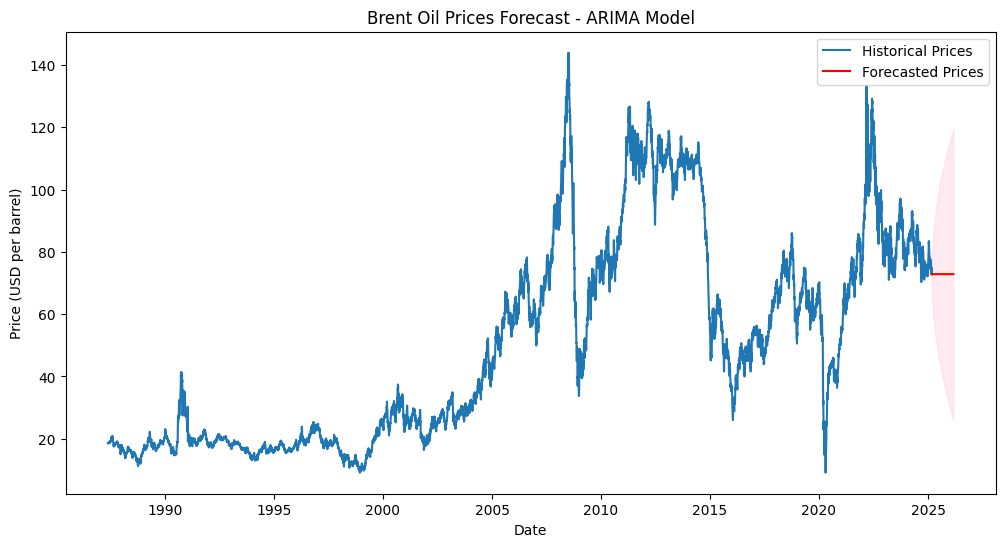

ARIMA model training and forecasting completed successfully.


In [4]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset with additional features
df_features = pd.read_csv('BrentOilPrices_Features.csv', parse_dates=['Date'])

# Define the ARIMA model
model = ARIMA(df_features['Price'], order=(5, 1, 0))
model_fit = model.fit()

# Forecast future prices
forecast_length = 365
forecast = model_fit.get_forecast(steps=forecast_length)
forecast_prices = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot the forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_features['Date'], df_features['Price'], label='Historical Prices')
future_dates = pd.date_range(start=df_features['Date'].iloc[-1], periods=forecast_length, freq='D')
plt.plot(future_dates, forecast_prices, label='Forecasted Prices', color='r')
plt.fill_between(future_dates, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Brent Oil Prices Forecast - ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.legend()
plt.show()

print("ARIMA model training and forecasting completed successfully.")


In [6]:
import pickle
# Save the ARIMA model
with open('arima_model.pkl', 'wb') as pkl:
    pickle.dump(model_fit, pkl)

print("ARIMA model saved successfully.")

ARIMA model saved successfully.


Mean Squared Error: 3.7549282565546194


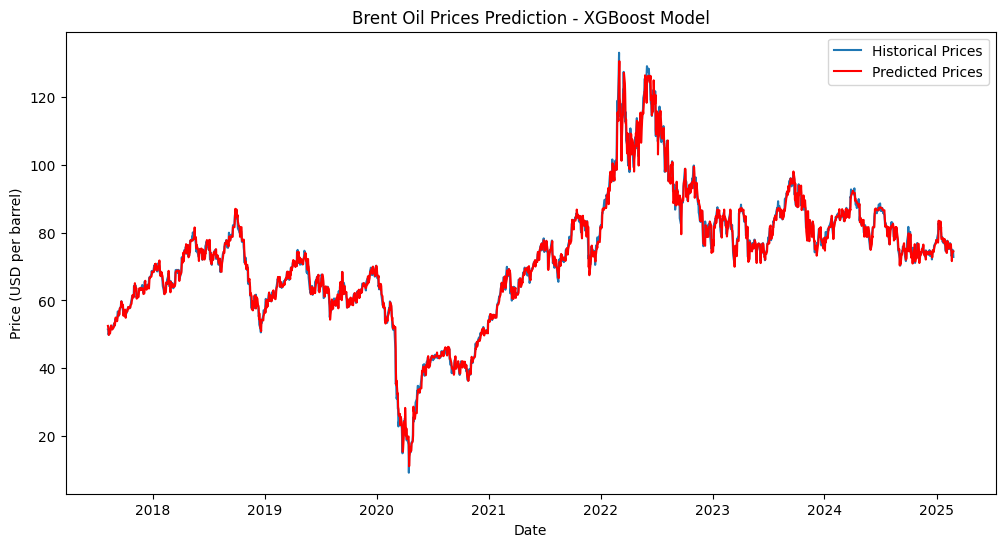

XGBoost model training and prediction completed successfully.


In [16]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset with additional features
df_features = pd.read_csv('D:/KAIM/Week 12/KAIM WEEK12/BrentOilPrices_Features.csv', parse_dates=['Date'])

# Create lagged features
def create_lagged_features(data, lag=1):
    df = data.copy()
    for i in range(1, lag + 1):
        df[f'lag_{i}'] = df['Price'].shift(i)
    return df.dropna()

lag = 5
df_lagged = create_lagged_features(df_features, lag)
X = df_lagged.drop(['Price', 'Date'], axis=1)
y = df_lagged['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define the XGBoost model
model = XGBRegressor(objective='reg:squarederror', n_estimators=100)

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Align the indices for plotting
plot_range = df_features['Date'][len(X_train) + lag : len(X_train) + lag + len(y_test)]

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(plot_range, y_test, label='Historical Prices')
plt.plot(plot_range, predictions, label='Predicted Prices', color='r')
plt.title('Brent Oil Prices Prediction - XGBoost Model')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.legend()
plt.show()

print("XGBoost model training and prediction completed successfully.")


In [17]:
import joblib
# Save the model
joblib.dump(model, 'xgboost_model.pkl')
print("XGBoost model saved successfully.")

XGBoost model saved successfully.
